In [33]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# A. Data Preprocessing

In [4]:
titanic_df = pd.read_csv('./data/titanic1.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


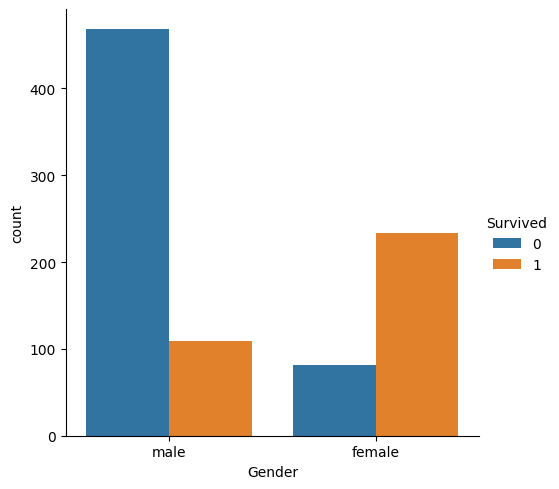

In [7]:
sns.catplot(x = 'Gender', hue = 'Survived',
               kind = 'count', data = titanic_df)

# B. Data Cleaning

In [9]:
titanic_df.drop(columns = 'Name', inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_df.drop(columns=['Cabin', 'Embarked', 'Ticket'], inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [11]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
881,882,0,3,male,33.0,0,0,7.8958
882,883,0,3,female,22.0,0,0,10.5167
883,884,0,2,male,28.0,0,0,10.5000
884,885,0,3,male,25.0,0,0,7.0500
885,886,0,3,female,39.0,0,5,29.1250
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000
890,891,0,3,male,32.0,0,0,7.7500


In [15]:
new = {'PassengerId': [891, 891, 891, 891],
       'Survived': [0, 0, 0, 0],
       'Pclass': [3, 3, 3, 3],
       'Gender': ['male', 'male', 'male', 'male'],
       'Age': [32.0, 32.0, 32.0, 32.0],
       'SibSp': [0, 0, 0, 0],
       'Parch': [0, 0, 0, 0],
       'Fare': [7.7500, 7.7500, 7.7500, 7.7500]}
new_df = pd.DataFrame(new)
titanic_df = pd.concat([titanic_df, new_df], ignore_index=True)

titanic_df.tail(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
885,886,0,3,female,39.0,0,5,29.125
886,887,0,2,male,27.0,0,0,13.000
887,888,1,1,female,19.0,0,0,30.000
888,889,0,3,female,NaN,1,2,23.450
889,890,1,1,male,26.0,0,0,30.000
890,891,0,3,male,32.0,0,0,7.750
891,891,0,3,male,32.0,0,0,7.750
892,891,0,3,male,32.0,0,0,7.750
893,891,0,3,male,32.0,0,0,7.750
894,891,0,3,male,32.0,0,0,7.750


In [16]:
titanic_df[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
891,891,0,3,male,32.0,0,0,7.75
892,891,0,3,male,32.0,0,0,7.75
893,891,0,3,male,32.0,0,0,7.75
894,891,0,3,male,32.0,0,0,7.75


In [17]:
titanic_df.drop_duplicates(inplace = True)
titanic_df[titanic_df.duplicated]
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
881,882,0,3,male,33.0,0,0,7.8958
882,883,0,3,female,22.0,0,0,10.5167
883,884,0,2,male,28.0,0,0,10.5000
884,885,0,3,male,25.0,0,0,7.0500
885,886,0,3,female,39.0,0,5,29.1250
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000
890,891,0,3,male,32.0,0,0,7.7500


In [18]:
titanic_df.isnull().head(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


<Axes: >

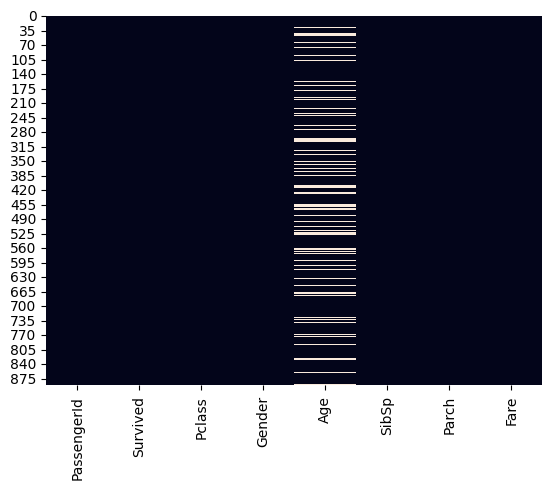

In [20]:
sns.heatmap(titanic_df.isnull(), cbar = False)

In [21]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [22]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [23]:
titanic_df.dropna(inplace = True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [24]:
titanic_df.dropna(axis = 1)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000
887,888,1,1,female,19.000000,0,0,30.0000
888,889,0,3,female,29.699118,1,2,23.4500
889,890,1,1,male,26.000000,0,0,30.0000


# C. Data Transformation

In [25]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [26]:
titanic_df.rename(columns = {'SibSp': 'Number of Siblings and Spouses Aboard'}, inplace = True)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Gender', 'Age',
       'Number of Siblings and Spouses Aboard', 'Parch', 'Fare'],
      dtype='object')

In [27]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Gender,Age,Number of Siblings and Spouses Aboard,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
5,6,0,3,male,29.699118,0,0,8.4583
6,7,0,1,male,54.000000,0,0,51.8625
7,8,0,3,male,2.000000,3,1,21.0750
8,9,1,3,female,27.000000,0,2,11.1333
9,10,1,2,female,14.000000,1,0,30.0708


In [28]:
titanic_df.replace({'Gender': {'male': 0}}, inplace = True)
titanic_df.replace({'Gender': {'female': 1}}, inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Gender,Age,Number of Siblings and Spouses Aboard,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


# D. Data Normalization

<Axes: ylabel='Fare'>

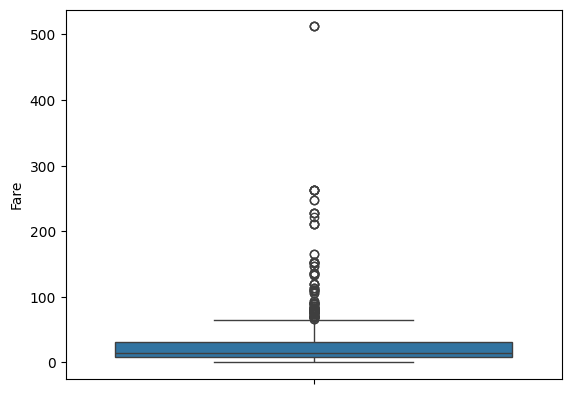

In [29]:
sns.boxplot(y = titanic_df['Fare'])

<Axes: ylabel='Fare'>

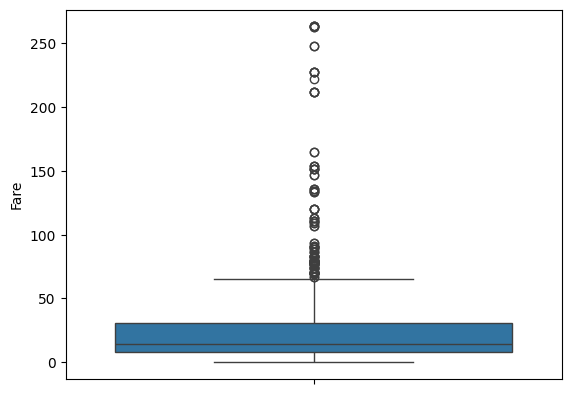

In [31]:
titanic_df.drop(titanic_df[titanic_df.Fare >= 500].index, inplace = True)
sns.boxplot(y = titanic_df['Fare'])

In [32]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Gender,Age,Number of Siblings and Spouses Aboard,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,0.352477,29.680083,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,0.478011,13.019819,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [34]:
scaler = MinMaxScaler()

titanic_df[['Fare']] = scaler.fit_transform(titanic_df[['Fare']])

titanic_df.describe()

,PassengerId,Survived,Pclass,Gender,Age,Number of Siblings and Spouses Aboard,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,0.352477,29.680083,0.524775,0.381757,0.116282
std,257.405474,0.486091,0.834007,0.478011,13.019819,1.104186,0.806949,0.156564
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.030022
50%,445.500000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,0.054959
75%,667.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,0.117003
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000
